In [1]:
# IMPORTS
# data science libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# loading linear algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# tree based algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# machine learning processing and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
# pandas display options
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

In [3]:
# read in data
df_og = pd.read_csv("heart_2020_cleaned.csv")
df_og.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
#class counts 
df_og.HeartDisease.value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [6]:
#grabing categorical data from the original data
str_cols = []

for col in df_og.columns:
    if (df_og[col].dtype == object) & (col != "HeartDisease"):
        print(col)
        str_cols.append(col)
        
df_str = df_og.loc[:, str_cols]
df_str.head()

Smoking
AlcoholDrinking
Stroke
DiffWalking
Sex
AgeCategory
Race
Diabetic
PhysicalActivity
GenHealth
Asthma
KidneyDisease
SkinCancer


,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No


In [7]:
#label encoding the categorical data
df_str_label = df_str.copy()
le = LabelEncoder()
col1 = df_str_label[['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']]
for i in col1:
  df_str_label[i] = le.fit_transform(df_str_label[i])
df_str_label.head()

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,1,0,0,0,0,55-59,White,Yes,1,Very good,1,0,1
1,0,0,1,0,0,80 or older,White,No,1,Very good,0,0,0
2,1,0,0,0,1,65-69,White,Yes,1,Fair,1,0,0
3,0,0,0,0,0,75-79,White,No,0,Good,0,0,1
4,0,0,0,1,0,40-44,White,No,1,Very good,0,0,0


In [8]:
#categorical data as a dataframe
df1 = df_str_label[['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']]

In [9]:
#adding dummies to the categorical data with more than 2 values
df_str_dum = pd.get_dummies(df_str_label.loc[:, ["AgeCategory", "Race", "Diabetic", "GenHealth"]])
df_str_dum.head()

,AgeCategory_18-24,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1


In [10]:
#collecting numerical data from original
num_cols = []

for col in df_og.columns:
    if (df_og[col].dtype != object) & (col != "HeartDisease"):
        print(col)
        num_cols.append(col)
        
df_num = df_og.loc[:, num_cols]
#df_num.head()

BMI
PhysicalHealth
MentalHealth
SleepTime


,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
2,26.58,20.0,30.0,8.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0


In [11]:
#grouping both sets of categorical data
df_str1 = pd.concat([df1, df_str_dum], axis=1)

In [12]:
df_no_scale = df_num.copy()

In [13]:
#Drop sleep time due to low coorilation (found in undersampling)
df_num.drop('SleepTime', axis=1, inplace=True)

In [14]:
#scaling the numerical data
Scaler = StandardScaler()
num_cols = ['MentalHealth', 'BMI', 'PhysicalHealth']

df_num[num_cols] = Scaler.fit_transform(df_num[num_cols])

In [15]:
df_scale=df_num.copy()

In [16]:
#make train data by combining categorical and numerical data
df_train_scale = pd.concat([df_scale, df_str1], axis=1)

In [17]:
# scale training set
df_train_scale = pd.concat([df_scale, df_str1], axis=1)
df_train_scale["HeartDisease"] = df_og.HeartDisease

df_train_scale["HeartDisease"] = [1 if x == "Yes" else 0 for x in df_train_scale.HeartDisease]
df_train_scale.head()

,BMI,PhysicalHealth,MentalHealth,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,AgeCategory_18-24,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,HeartDisease
0,-1.844750,-0.046751,3.281069,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
1,-1.256338,-0.424070,-0.490039,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
2,-0.274603,2.091388,3.281069,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
3,-0.647473,-0.424070,-0.490039,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0
4,-0.726138,3.097572,-0.490039,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0


In [18]:
#make new dataset with same cleaning
df_og2 = df_og.copy()

df_str_2 = df_og2.loc[:, str_cols]

col1 = df_str_2[['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']]

le = LabelEncoder()
for i in col1:
  df_str_2[i] = le.fit_transform(df_str_2[i])

df2 = df_str_2[['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']]

df_dum_2 = pd.get_dummies(df_str_2.loc[:, ["AgeCategory", "Race", "Diabetic", "GenHealth"]])

df_string_2=pd.concat([df2, df_dum_2], axis=1)

num_cols2 = []

for col in df_og2.columns:
    if (df_og2[col].dtype != object) & (col != "HeartDisease"):
        print(col)
        num_cols2.append(col)

BMI
PhysicalHealth
MentalHealth
SleepTime


In [19]:
        
df_num2 = df_og2.loc[:, num_cols2]
df_num2.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
2,26.58,20.0,30.0,8.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0


In [20]:
df_num2.drop('SleepTime', axis=1, inplace=True)

num_cols3 = ['MentalHealth', 'BMI', 'PhysicalHealth']

df_num2[num_cols3] = Scaler.transform(df_num2[num_cols3])
df_num2.head()

,BMI,PhysicalHealth,MentalHealth
0,-1.844750,-0.046751,3.281069
1,-1.256338,-0.424070,-0.490039
2,-0.274603,2.091388,3.281069
3,-0.647473,-0.424070,-0.490039
4,-0.726138,3.097572,-0.490039


In [21]:
df_og2 = df_og.copy()

df_str_2 = df_og2.loc[:, str_cols]

col1 = df_str_2[['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']]

le = LabelEncoder()
for i in col1:
  df_str_2[i] = le.fit_transform(df_str_2[i])

df2 = df_str_2[['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']]

df_dum_2 = pd.get_dummies(df_str_2.loc[:, ["AgeCategory", "Race", "Diabetic", "GenHealth"]])

df_string_2=pd.concat([df2, df_dum_2], axis=1)

num_cols2 = []

for col in df_og2.columns:
    if (df_og2[col].dtype != object) & (col != "HeartDisease"):
        print(col)
        num_cols2.append(col)
        
df_num2 = df_og2.loc[:, num_cols2]

df_num2.drop('SleepTime', axis=1, inplace=True)

num_cols3 = ['MentalHealth', 'BMI', 'PhysicalHealth']

df_num2[num_cols3] = Scaler.transform(df_num2[num_cols3])
df_num2.head()
df_all = pd.concat([df_num2, df_string_2], axis=1)
df_all["HeartDisease"] = [1 if x == "Yes" else 0 for x in df_og2.HeartDisease]
df_all.head()

BMI
PhysicalHealth
MentalHealth
SleepTime


,BMI,PhysicalHealth,MentalHealth,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,AgeCategory_18-24,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,HeartDisease
0,-1.844750,-0.046751,3.281069,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
1,-1.256338,-0.424070,-0.490039,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
2,-0.274603,2.091388,3.281069,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
3,-0.647473,-0.424070,-0.490039,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0
4,-0.726138,3.097572,-0.490039,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0


In [24]:
# get features and target
X = df_train_scale.drop(["HeartDisease"], axis=1).values
y = df_train_scale["HeartDisease"].values

In [25]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)

print(len(X_train) / len(X))
print(len(X_test) / len(X))

0.7499992182491909
0.2500007817508091


In [26]:
len(X_train)

239846

In [27]:
239846/27373

8.762137873086619

In [28]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

Counter(y_resampled)

Counter({0: 219418, 1: 219418})

In [30]:
print(len(X_resampled))
print(len(X_train))


438836
239846


In [31]:
#function to use when trianing different models.
def evaluateModel(model, X_resampled, y_resampled, X_test, y_test):
    # FIT THE MODEL
    model.fit(X_resampled, y_resampled)

    # EVALUATE the MODEL
    train_preds = model.predict(X_resampled)
    test_preds = model.predict(X_test)

    # PRINT the METRICS
    print("TRAINING SET")

    class_report_train = classification_report(y_resampled, train_preds)
    conf_matrix_train = confusion_matrix(y_resampled, train_preds)

    print(class_report_train)
    print(conf_matrix_train)

    print()

    # PRINT the METRICS
    print("Testing SET")

    class_report_test = classification_report(y_test, test_preds)
    conf_matrix_test = confusion_matrix(y_test, test_preds)

    print(class_report_test)
    print(conf_matrix_test)
    
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(10,6))
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Test Set")
    plt.legend(loc=4)
    plt.show()
    
    return(model)

### Model building Random Oversample

TRAINING SET
              precision    recall  f1-score   support

           0       0.77      0.75      0.76    219418
           1       0.76      0.78      0.77    219418

    accuracy                           0.76    438836
   macro avg       0.77      0.76      0.76    438836
weighted avg       0.77      0.76      0.76    438836

[[164169  55249]
 [ 47903 171515]]

Testing SET
              precision    recall  f1-score   support

           0       0.97      0.75      0.84     73004
           1       0.23      0.78      0.35      6945

    accuracy                           0.75     79949
   macro avg       0.60      0.76      0.60     79949
weighted avg       0.91      0.75      0.80     79949

[[54441 18563]
 [ 1549  5396]]


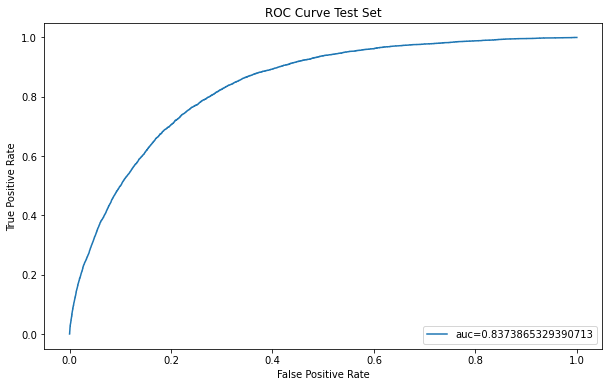

In [32]:
# Initialize the model
lr = LogisticRegression()
lr = evaluateModel(lr, X_resampled, y_resampled, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.82      0.76      0.79    219418
           1       0.77      0.83      0.80    219418

    accuracy                           0.80    438836
   macro avg       0.80      0.80      0.80    438836
weighted avg       0.80      0.80      0.80    438836

[[166159  53259]
 [ 36273 183145]]

Testing SET
              precision    recall  f1-score   support

           0       0.97      0.75      0.85     73004
           1       0.22      0.76      0.35      6945

    accuracy                           0.75     79949
   macro avg       0.60      0.76      0.60     79949
weighted avg       0.91      0.75      0.80     79949

[[54717 18287]
 [ 1636  5309]]


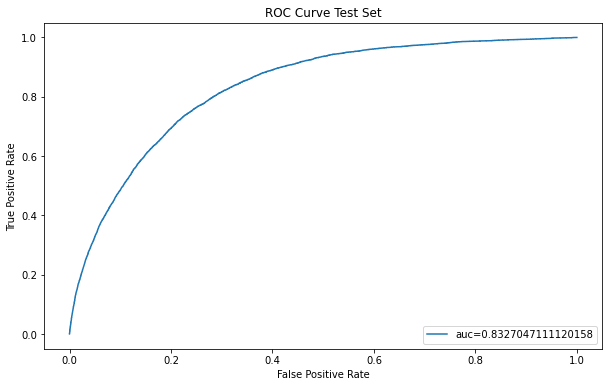

In [33]:
lr = XGBClassifier()
lr = evaluateModel(lr, X_resampled, y_resampled, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.81      0.73      0.76    219418
           1       0.75      0.82      0.79    219418

    accuracy                           0.77    438836
   macro avg       0.78      0.77      0.77    438836
weighted avg       0.78      0.77      0.77    438836

[[159170  60248]
 [ 38518 180900]]

Testing SET
              precision    recall  f1-score   support

           0       0.98      0.72      0.83     73004
           1       0.22      0.81      0.34      6945

    accuracy                           0.73     79949
   macro avg       0.60      0.76      0.59     79949
weighted avg       0.91      0.73      0.79     79949

[[52764 20240]
 [ 1339  5606]]


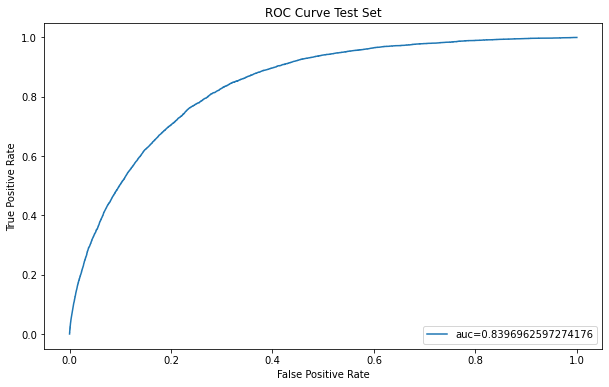

In [34]:
lgbm = LGBMClassifier(random_state=42)
lgbmre = evaluateModel(lgbm, X_resampled, y_resampled, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.77      0.75      0.76    219418
           1       0.76      0.77      0.77    219418

    accuracy                           0.76    438836
   macro avg       0.76      0.76      0.76    438836
weighted avg       0.76      0.76      0.76    438836

[[165369  54049]
 [ 49413 170005]]

Testing SET
              precision    recall  f1-score   support

           0       0.97      0.75      0.85     73004
           1       0.23      0.77      0.35      6945

    accuracy                           0.75     79949
   macro avg       0.60      0.76      0.60     79949
weighted avg       0.91      0.75      0.81     79949

[[54938 18066]
 [ 1592  5353]]


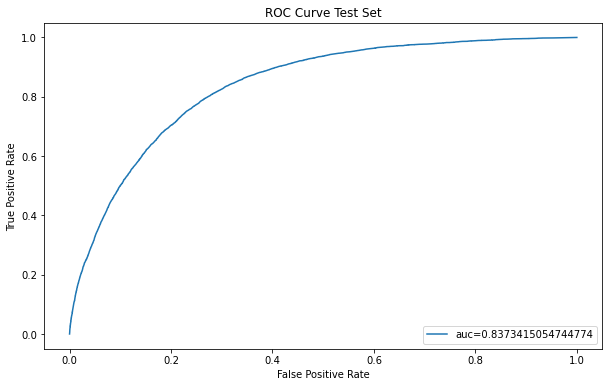

In [35]:
ada = AdaBoostClassifier(random_state=42)
ada = evaluateModel(ada, X_resampled, y_resampled, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    219418
           1       0.99      1.00      0.99    219418

    accuracy                           0.99    438836
   macro avg       0.99      0.99      0.99    438836
weighted avg       0.99      0.99      0.99    438836

[[216161   3257]
 [   209 219209]]

Testing SET
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     73004
           1       0.26      0.24      0.25      6945

    accuracy                           0.87     79949
   macro avg       0.59      0.59      0.59     79949
weighted avg       0.87      0.87      0.87     79949

[[68217  4787]
 [ 5300  1645]]


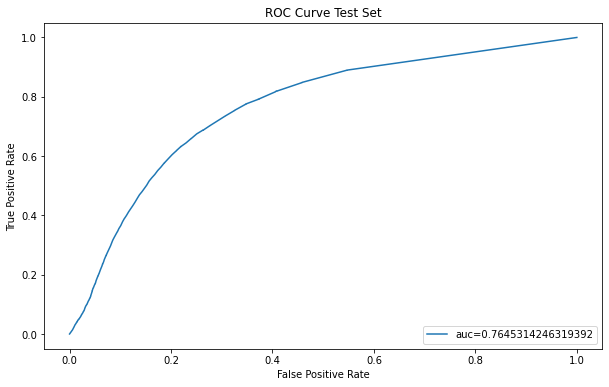

In [36]:
randomForest = RandomForestClassifier(random_state=42)
randomForest = evaluateModel(randomForest, X_resampled, y_resampled, X_test, y_test)

In [37]:
#first Machine Learning attempt determined that Random Forest 
#is our best model to determine if a patient has heart disease or not

In [38]:
# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled_smote, y_resampled_smote = SMOTE(random_state=1).fit_resample(
    X_train, y_train
)
Counter(y_resampled_smote)

Counter({0: 219418, 1: 219418})

In [39]:
def evaluateModel(model, X_resampled_smote, y_resampled_smote, X_test, y_test):
    # FIT THE MODEL
    model.fit(X_resampled_smote, y_resampled_smote)

    # EVALUATE the MODEL
    train_preds = model.predict(X_resampled_smote)
    test_preds = model.predict(X_test)

    # PRINT the METRICS
    print("TRAINING SET")

    class_report_train = classification_report(y_resampled_smote, train_preds)
    conf_matrix_train = confusion_matrix(y_resampled_smote, train_preds)

    print(class_report_train)
    print(conf_matrix_train)

    print()

    # PRINT the METRICS
    print("Testing SET")

    class_report_test = classification_report(y_test, test_preds)
    conf_matrix_test = confusion_matrix(y_test, test_preds)

    print(class_report_test)
    print(conf_matrix_test)
    
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(10,6))
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Test Set")
    plt.legend(loc=4)
    plt.show()
    
    return(model)

### Model Building on SMOTE sampling

TRAINING SET
              precision    recall  f1-score   support

           0       0.78      0.75      0.76    219418
           1       0.76      0.80      0.78    219418

    accuracy                           0.77    438836
   macro avg       0.77      0.77      0.77    438836
weighted avg       0.77      0.77      0.77    438836

[[163552  55866]
 [ 44816 174602]]

Testing SET
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     73004
           1       0.22      0.78      0.35      6945

    accuracy                           0.75     79949
   macro avg       0.60      0.76      0.59     79949
weighted avg       0.91      0.75      0.80     79949

[[54248 18756]
 [ 1540  5405]]


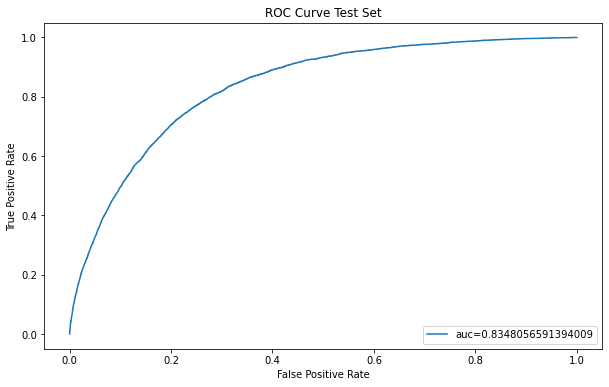

In [40]:
# Initialize the model
lr = LogisticRegression()
lrsm = evaluateModel(lr, X_resampled_smote, y_resampled_smote, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.89      0.93      0.91    219418
           1       0.92      0.89      0.90    219418

    accuracy                           0.91    438836
   macro avg       0.91      0.91      0.91    438836
weighted avg       0.91      0.91      0.91    438836

[[203446  15972]
 [ 25124 194294]]

Testing SET
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     73004
           1       0.29      0.32      0.31      6945

    accuracy                           0.87     79949
   macro avg       0.61      0.62      0.62     79949
weighted avg       0.88      0.87      0.88     79949

[[67480  5524]
 [ 4690  2255]]


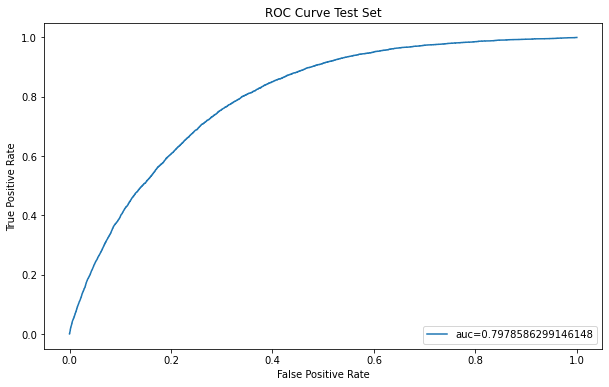

In [41]:
lr = XGBClassifier()
lr = evaluateModel(lr, X_resampled_smote, y_resampled_smote, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.88      0.91      0.90    219418
           1       0.91      0.88      0.89    219418

    accuracy                           0.90    438836
   macro avg       0.90      0.90      0.90    438836
weighted avg       0.90      0.90      0.90    438836

[[199746  19672]
 [ 26342 193076]]

Testing SET
              precision    recall  f1-score   support

           0       0.94      0.91      0.92     73004
           1       0.29      0.38      0.33      6945

    accuracy                           0.86     79949
   macro avg       0.61      0.65      0.63     79949
weighted avg       0.88      0.86      0.87     79949

[[66411  6593]
 [ 4294  2651]]


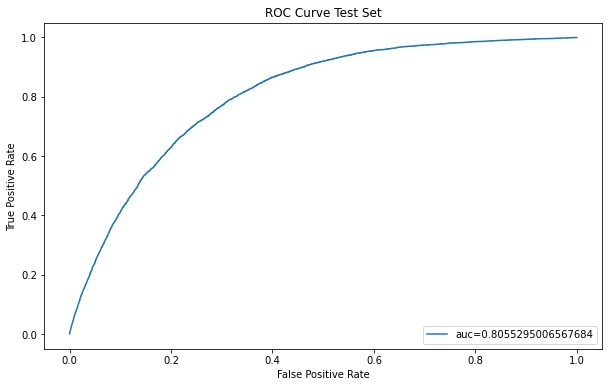

In [42]:
lgbm = LGBMClassifier(random_state=42)
lgbm = evaluateModel(lgbm, X_resampled_smote, y_resampled_smote, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    219418
           1       1.00      1.00      1.00    219418

    accuracy                           1.00    438836
   macro avg       1.00      1.00      1.00    438836
weighted avg       1.00      1.00      1.00    438836

[[218677    741]
 [  1008 218410]]

Testing SET
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     73004
           1       0.24      0.26      0.25      6945

    accuracy                           0.87     79949
   macro avg       0.59      0.59      0.59     79949
weighted avg       0.87      0.87      0.87     79949

[[67324  5680]
 [ 5112  1833]]


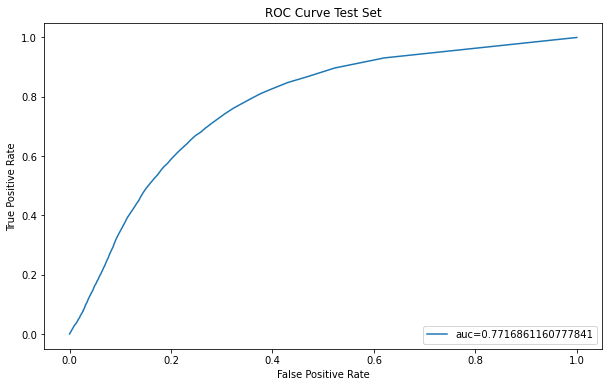

In [43]:
randomForestsmote = RandomForestClassifier(random_state=42)
randomForestsmote = evaluateModel(randomForestsmote, X_resampled_smote, y_resampled_smote, X_test, y_test)

Random Oversample trained RandomForest model on Actual Data
              precision    recall  f1-score   support

           0       0.98      0.97      0.98    292422
           1       0.73      0.81      0.77     27373

    accuracy                           0.96    319795
   macro avg       0.86      0.89      0.87    319795
weighted avg       0.96      0.96      0.96    319795

[[284378   8044]
 [  5328  22045]]


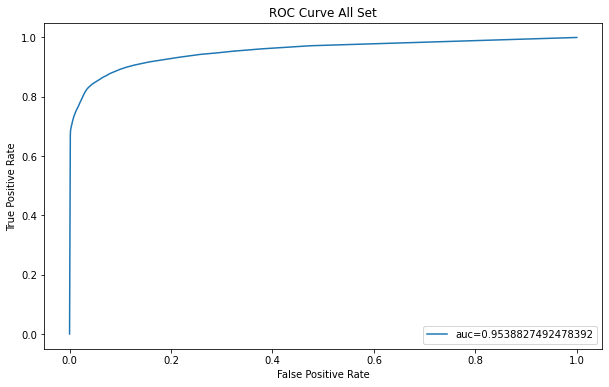

In [44]:
# get features and target
x_all = df_all.drop(["HeartDisease"], axis=1).values
y_all = df_all["HeartDisease"].values

test_preds = randomForest.predict(x_all)
class_report_test = classification_report(y_all, test_preds)
conf_matrix_test = confusion_matrix(y_all, test_preds)
print('Random Oversample trained RandomForest model on Actual Data')
print(class_report_test)
print(conf_matrix_test)

y_pred_proba = randomForest.predict_proba(x_all)[::,1]
fpr, tpr, _ = roc_curve(y_all,  y_pred_proba)
auc = roc_auc_score(y_all, y_pred_proba)

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve All Set")
plt.legend(loc=4)
plt.show()

Random Oversample trained LGBM model on Actual Data
              precision    recall  f1-score   support

           0       0.98      0.72      0.83    292422
           1       0.22      0.82      0.34     27373

    accuracy                           0.73    319795
   macro avg       0.60      0.77      0.59    319795
weighted avg       0.91      0.73      0.79    319795

[[211934  80488]
 [  4955  22418]]


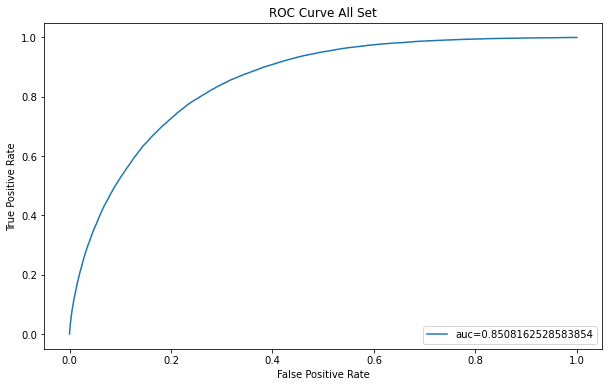

In [45]:
# Oversampling BASIC LGBM MODEL
# get features and target
x_all = df_all.drop(["HeartDisease"], axis=1).values
y_all = df_all["HeartDisease"].values

test_preds = lgbmre.predict(x_all)
class_report_test = classification_report(y_all, test_preds)
conf_matrix_test = confusion_matrix(y_all, test_preds)
print('Random Oversample trained LGBM model on Actual Data')
print(class_report_test)
print(conf_matrix_test)

y_pred_proba = lgbmre.predict_proba(x_all)[::,1]
fpr, tpr, _ = roc_curve(y_all,  y_pred_proba)
auc = roc_auc_score(y_all, y_pred_proba)

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve All Set")
plt.legend(loc=4)
plt.show()

SMOTE trained Logistic Regression model on Actual Data
              precision    recall  f1-score   support

           0       0.97      0.74      0.84    292422
           1       0.22      0.78      0.35     27373

    accuracy                           0.75    319795
   macro avg       0.60      0.76      0.60    319795
weighted avg       0.91      0.75      0.80    319795

[[217800  74622]
 [  6004  21369]]


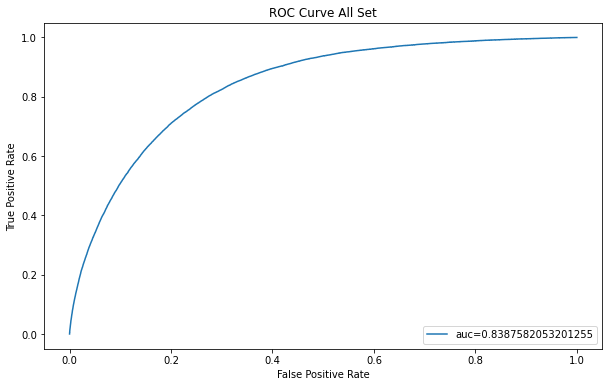

In [46]:
#SMOTE BEST MODEL lOGISTIC REGRESSION
# get features and target
x_all = df_all.drop(["HeartDisease"], axis=1).values
y_all = df_all["HeartDisease"].values

test_preds = lrsm.predict(x_all)
class_report_test = classification_report(y_all, test_preds)
conf_matrix_test = confusion_matrix(y_all, test_preds)
print('SMOTE trained Logistic Regression model on Actual Data')
print(class_report_test)
print(conf_matrix_test)

y_pred_proba = lrsm.predict_proba(x_all)[::,1]
fpr, tpr, _ = roc_curve(y_all,  y_pred_proba)
auc = roc_auc_score(y_all, y_pred_proba)

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve All Set")
plt.legend(loc=4)
plt.show()

In [47]:
import pickle

In [48]:
filename = 'finalized_model_ov.sav'
pickle.dump(randomForest, open(filename, 'wb'))
pickle.dump(Scaler, open('scaler.sav', 'wb'))

In [49]:
df_allModel = df_all.drop(["HeartDisease"], axis=1)

In [50]:
df_allModel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   BMI                                  319795 non-null  float64
 1   PhysicalHealth                       319795 non-null  float64
 2   MentalHealth                         319795 non-null  float64
 3   Smoking                              319795 non-null  int32  
 4   AlcoholDrinking                      319795 non-null  int32  
 5   Stroke                               319795 non-null  int32  
 6   DiffWalking                          319795 non-null  int32  
 7   Sex                                  319795 non-null  int32  
 8   PhysicalActivity                     319795 non-null  int32  
 9   Asthma                               319795 non-null  int32  
 10  KidneyDisease                        319795 non-null  int32  
 11  SkinCancer   

In [51]:
Rforest_load = pickle.load(open(filename,'rb'))
Scaler = pickle.load(open('scaler.sav', 'rb'))

In [52]:
X = np.array(df_allModel)
preds = Rforest_load.predict_proba(X)
preds_singular = Rforest_load.predict(X)

preds_singular[0]

0

In [53]:
submission = pd.DataFrame()

In [54]:
submission = pd.DataFrame()
submission["HeartDisease"] = df_og.HeartDisease
submission['Predictions'] = preds_singular

submission.head(20)

,HeartDisease,Predictions
0,No,0
1,No,0
2,No,0
3,No,0
4,No,0
5,Yes,1
6,No,0
7,No,0
8,No,0
9,No,0


In [55]:
df_og.head(6)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No


In [56]:
content = {'BMI': '28.87', 'PhysicalHealth': '6.0', 'MentalHealth': '0', 'Smoking': 'Yes', 'AlcoholDrinking': 'No',
           'Stroke': 'No', 'DiffWalking': 'Yes', 'Sex': 'Female', 'PhysicalActivity': 'No', 'Asthma': 'No',
           'KidneyDisease': 'No', 'SkinCancer':'No', "AgeCategory": '75-79', 'Race': 'Black', 'Diabetic': 'No', 'GenHealth':'Fair'}
content

{'BMI': '28.87',
 'PhysicalHealth': '6.0',
 'MentalHealth': '0',
 'Smoking': 'Yes',
 'AlcoholDrinking': 'No',
 'Stroke': 'No',
 'DiffWalking': 'Yes',
 'Sex': 'Female',
 'PhysicalActivity': 'No',
 'Asthma': 'No',
 'KidneyDisease': 'No',
 'SkinCancer': 'No',
 'AgeCategory': '75-79',
 'Race': 'Black',
 'Diabetic': 'No',
 'GenHealth': 'Fair'}

In [57]:
new = pd.DataFrame([content])
cols7= ['MentalHealth', 'BMI', 'PhysicalHealth']
new[cols7] = Scaler.transform(new[cols7])

In [58]:
new

,BMI,PhysicalHealth,MentalHealth,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,AgeCategory,Race,Diabetic,GenHealth
0,0.085682,0.330568,-0.490039,Yes,No,No,Yes,Female,No,No,No,No,75-79,Black,No,Fair


In [59]:
#parse
BMI = float(new['BMI'])
PhysicalHealth = float(new['PhysicalHealth'])
MentalHealth = float(new['MentalHealth'])
Smoking = content['Smoking']
AlcoholDrinking = content['AlcoholDrinking']
Stroke = content['Stroke']
DiffWalking = content['DiffWalking']
Sex = content['Sex']
PhysicalActivity = content['PhysicalActivity']
Asthma = content['Asthma']
KidneyDisease = content['KidneyDisease']
SkinCancer = content['SkinCancer']
AgeCategory = content['AgeCategory']
Race = content['Race']
Diabetic = content['Diabetic']
GenHealth = content['GenHealth']

In [60]:
AgeCat_18 = 0
AgeCat_25 = 0
AgeCat_30 = 0
AgeCat_35 = 0
AgeCat_40 = 0
AgeCat_45 = 0
AgeCat_50 = 0
AgeCat_55 = 0
AgeCat_60 = 0
AgeCat_65 = 0
AgeCat_70 = 0
AgeCat_75 = 0
AgeCat_80 = 0
Race_w = 0
Race_aa = 0
Race_asi = 0
Race_b = 0
Race_h = 0
Race_o = 0
diabetic_n = 0
diabetic_nbd = 0
diabetic_y = 0
diabetic_yp = 0
gen_e=0
gen_vg = 0
gen_f = 0
gen_g= 0
gen_p = 0
Smoking_n = 0 
AlcoholDrinking_n = 0
Stroke_n = 0
DiffWalking_n = 0
Sex_n = 0
Asthma_n = 0
KidneyDisease_n = 0
SkinCancer_n = 0
PhysicalActivity_n = 0

In [61]:
 # parse pclass

if (GenHealth == 'Excellent'):
    gen_e = 1
elif (GenHealth == 'Fair'):
    gen_f = 1
elif (GenHealth == 'Good'):
    gen_g = 1
elif (GenHealth == 'Poor'):
    gen_p = 1
elif (GenHealth == 'Very good'):
    gen_vg = 1
else:
    pass
    
if (AgeCategory == '18-24'):
    AgeCat_18 = 1
elif (AgeCategory == '25-29'):
    AgeCat_25 = 1
elif (AgeCategory == '30-34'):
    AgeCat_30 = 1
elif (AgeCategory == '35-39'):
    AgeCat_35 = 1
elif (AgeCategory == '40-44'):
    AgeCat_40 = 1
elif (AgeCategory == '45-49'):
    AgeCat_45 = 1
elif (AgeCategory == '50-54'):
    AgeCat_50 = 1
elif (AgeCategory == '55-59'):
    AgeCat_55 = 1
elif (AgeCategory == '60-64'):
    AgeCat_60 = 1
elif (AgeCategory == '65-69'):
    AgeCat_65 = 1
elif (AgeCategory == '70-74'):
    AgeCat_70 = 1
elif (AgeCategory == '75-79'):
    AgeCat_75 = 1
elif (AgeCategory == '80 or older'):
    AgeCat_80 = 1
else:
    pass

if (Diabetic == 'No, borderline diabetes'):
    diabetic_nbd = 1
elif (Diabetic == 'No'):
    diabetic_n = 1
elif (Diabetic == 'Yes'):
    diabetic_y = 1
elif (Diabetic == 'Yes (during pregnancy)'):
    diabetic_yp = 1
else:
    pass

    

    
if (Race == 'White'):
    Race_w = 1
elif (Race == 'American Indian/Alaskan Native'):
    Race_aa = 1
elif (Race == 'Asian'):
    Race_asi = 1
elif (Race == 'Black'):
    Race_b = 1
elif (Race == 'Hispanic'):
    Race_h = 1
elif (Race == 'Other'):
    Race_o = 1
else:
    pass

    
if (Smoking == 'Yes'):
    Smoking_n = 1
else: 
    pass

if (AlcoholDrinking == 'Yes'):
    AlcoholDrinking_n = 1
else: 
    pass

if (Stroke == 'Yes'):
    Stroke_n = 1
else: 
    pass

if (DiffWalking == 'Yes'):
    DiffWalking_n = 1
else: 
    pass

if (Sex == 'Male'):
    Sex_n = 1
else: 
    pass

if (Asthma == 'Yes'):
    Asthma_n = 1
else: 
    pass
if (KidneyDisease == 'Yes'):
    KidneyDisease_n = 1
else: 
    pass
if (SkinCancer == 'Yes'):
    SkinCancer_n = 1
else: 
    pass
if (PhysicalActivity == 'Yes'):
    PhysicalActivity_n = 1
else: 
    pass

In [62]:
# num_cols = ['MentalHealth', 'BMI', 'PhysicalHealth']
# Scaler = StandardScaler()

# df_num[num_cols] = Scaler.fit_transform(df_num[num_cols])

In [63]:
df_og.head(6)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No


In [64]:
input_pred = [[BMI, PhysicalHealth, MentalHealth, Smoking_n, AlcoholDrinking_n,Stroke_n,DiffWalking_n,Sex_n,
               PhysicalActivity_n,Asthma_n,KidneyDisease_n,SkinCancer_n,AgeCat_18,AgeCat_25,
               AgeCat_30,AgeCat_35,AgeCat_40,AgeCat_45,AgeCat_50,AgeCat_55,AgeCat_60,AgeCat_65, AgeCat_70,
              AgeCat_75,AgeCat_80,Race_aa,Race_asi,Race_b,Race_h,Race_o,Race_w,diabetic_n,
               diabetic_nbd,diabetic_y,diabetic_yp,gen_e,gen_f,gen_g,gen_p,gen_vg]]
input_pred

[[0.08568183530515983,
  0.3305676810999148,
  -0.490038588254678,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0]]

In [65]:
 pd.DataFrame(input_pred, columns=df_allModel.columns)

,BMI,PhysicalHealth,MentalHealth,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,AgeCategory_18-24,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0.085682,0.330568,-0.490039,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0


In [66]:
df_allModel.head(6)

,BMI,PhysicalHealth,MentalHealth,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,AgeCategory_18-24,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,-1.844750,-0.046751,3.281069,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
1,-1.256338,-0.424070,-0.490039,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
2,-0.274603,2.091388,3.281069,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
3,-0.647473,-0.424070,-0.490039,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
4,-0.726138,3.097572,-0.490039,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
5,0.085682,0.330568,-0.490039,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0


In [67]:
filename = 'finalized_model_ov.sav'
Rforest_load = pickle.load(open(filename, 'rb'))
Scaler = pickle.load(open('scaler.sav', 'rb'))


In [68]:
X = np.array(input_pred)
preds = Rforest_load.predict_proba(X)
preds_singular = Rforest_load.predict(X)

In [69]:
preds

array([[0., 1.]])

In [70]:
 preds_singular

array([1], dtype=int64)